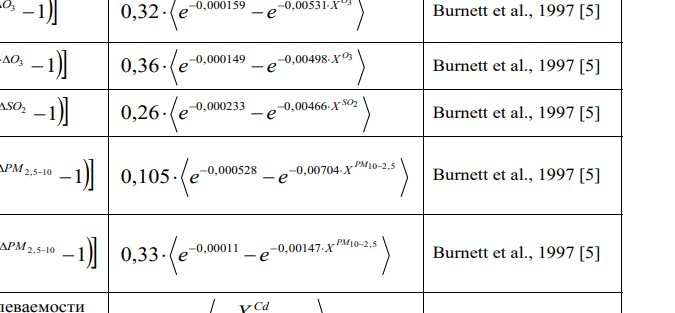

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [5]:
def get_delta_R_heart(x):
    kelly = torch.nn.ReLU()
    return 0.105 * kelly(torch.exp(torch.tensor(-0.000528)) - torch.exp(torch.tensor(-0.00704 * x)))

def get_delta_R_lungs(x):
    kelly = torch.nn.ReLU()
    return 0.33 * kelly(torch.exp(torch.tensor(-0.00011)) - torch.exp(torch.tensor(-0.00147 * x)))

def clamp_probs(probs):
    return [1 if i > 1 else i for i in probs]

In [6]:
def get_risk_evolution(delta_r_func, a, c):
    risk_values = []
    
    R_i = torch.tensor(0.0)
    
    for _ in range(120):
        R_i_next = R_i + (a * R_i + delta_r_func(c))
        risk_values.append(R_i.item())
        R_i = R_i_next
    
    return clamp_probs(risk_values)

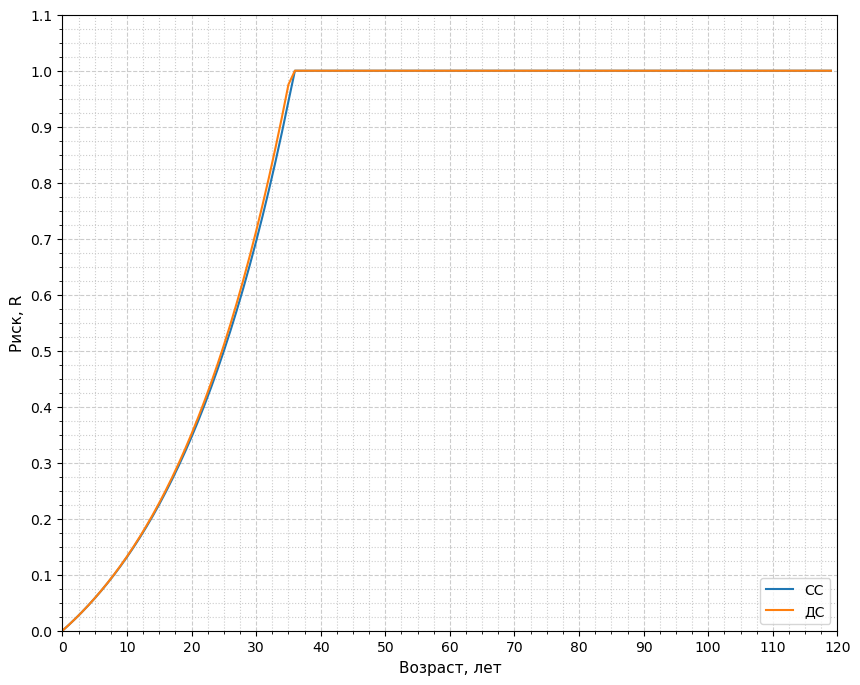

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

heart_risk = get_risk_evolution(get_delta_R_heart, 0.05, 0.75)
lung_risk = get_risk_evolution(get_delta_R_heart, 0.0515, 0.75)

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.plot(heart_risk, label='СС')
ax.plot(lung_risk, label='ДС')

ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)
# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

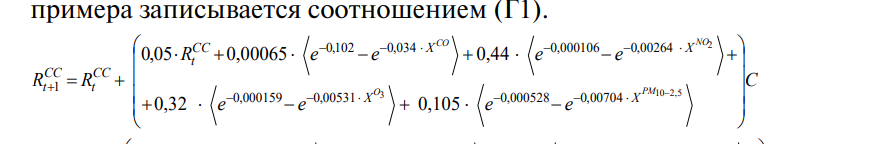

In [1]:
def get_delta_test():
    
    kelly = torch.nn.ReLU()
    
    first = 0.00065 * kelly(torch.exp(torch.tensor(-0.102)) - torch.exp(torch.tensor(-0.034 * 4.5)))
    sec = 0.44 * kelly(torch.exp(torch.tensor(-0.000159)) - torch.exp(torch.tensor(-0.00531 * 0.055)))
    third = 0.105 * kelly(torch.exp(torch.tensor(-0.000528)) - torch.exp(torch.tensor(-0.00704 * o3)))
    
    return first + sec + third

In [2]:
def get_risk_evolution(delta_r_func, a, c):
    risk_values = []
    
    R_i = torch.tensor(0.0)
    
    for _ in range(120):
        R_i_next = R_i + (a * R_i + delta_r_func(c))
        risk_values.append(R_i.item())
        R_i = R_i_next
    
    return clamp_probs(risk_values)

In [ ]:
risks_test = get_delta_test()